In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
nltk.download('punkt')
nltk.download('tagsets')
nltk.help.upenn_tagset()
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

import random

import pickle #install

import pandas as pd

from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn import metrics

from statistics import mode #install

import json

import csv

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from os import path

from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from xgboost import XGBClassifier

from tabulate import tabulate

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edwardsrk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\edwardsrk\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

ModuleNotFoundError: No module named 'tabulate'

In [13]:
df1 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_1.csv')
df2 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_2.csv')
df3 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_3.csv')
df4 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_4.csv')
df5 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0314_5.csv')

df6 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_1.csv')
df7 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_2.csv')
df8 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_3.csv')
df9 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_4.csv')
df10 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0315_5.csv')

df11 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_1.csv')
df12 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_2.csv')
df13 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_3.csv')
df14 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_4.csv')
df15 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0316_5.csv')

df16 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_1.csv')
df17 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_2.csv')
df18 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_3.csv')
df19 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_4.csv')
df20 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0317_5.csv')

df21 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_1.csv')
df22 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_2.csv')
df23 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_3.csv')
df24 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_4.csv')
df25 = pd.read_csv('C:/Users/edwardsrk/anxiety-tweets/depression-anxiety-tweets/data/0318_5.csv')
#10 data sets of variable size
#will have to grab rest of data later

In [14]:
dfs_to_concat= [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18
               ,df19,df20,df21,df22,df23,df24,df25]
#list of all datasets

In [15]:
df1.username.nunique()

271

In [16]:
df2.shape, df3.shape

((10, 12), (1000, 12))

In [17]:
df = pd.concat(dfs_to_concat)
#combine all ten datasets into one dataframe

In [18]:
df.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,3/14/2020 23:55,AlbertoxVazquez,NaN,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,NaN,1.238980e+18,https://twitter.com/AlbertoxVazquez/status/123...
1,3/14/2020 23:54,TheOGKennedy,NaN,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,NaN,1.238980e+18,https://twitter.com/TheOGKennedy/status/123897...
2,3/14/2020 23:45,megmarie5,NaN,0,0,0,@ariana2525 I myself suffered & still suffer. ...,NaN,@ariana2525,NaN,1.238970e+18,https://twitter.com/megmarie5/status/123897468...
3,3/14/2020 23:43,BoozyBillsBabe,NaN,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,NaN,1.238970e+18,https://twitter.com/BoozyBillsBabe/status/1238...
4,3/14/2020 23:42,megmarie5,NaN,0,0,1,I’m behind on @VanderpumpRules and binge watch...,NaN,@VanderpumpRules @ariana2525,NaN,1.238970e+18,https://twitter.com/megmarie5/status/123897385...


In [19]:
df.shape

(9276, 12)

In [20]:
df = df.drop(['geo', 'to', 'permalink'], axis = 1)
#dropping columns I don't want/mostly empty

In [21]:
df.head()

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
0,3/14/2020 23:55,AlbertoxVazquez,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,1.238980e+18
1,3/14/2020 23:54,TheOGKennedy,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,1.238980e+18
2,3/14/2020 23:45,megmarie5,0,0,0,@ariana2525 I myself suffered & still suffer. ...,@ariana2525,NaN,1.238970e+18
3,3/14/2020 23:43,BoozyBillsBabe,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,1.238970e+18
4,3/14/2020 23:42,megmarie5,0,0,1,I’m behind on @VanderpumpRules and binge watch...,@VanderpumpRules @ariana2525,NaN,1.238970e+18


In [22]:
df.isnull().sum(axis = 0)
# looks like more than half of mentions and hashtags are null

date            0
username        0
replies         0
retweets        0
favorites       0
text            1
mentions     8406
hashtags     7935
id              0
dtype: int64

In [23]:
df.username.nunique()
#there are some user names that are repeated
#find them?

7666

In [28]:
#usr_count = 
df.username.value_counts()
#user names with the amount of tweets they tweet

GamesRedDeer     87
jon_phillip      12
Bipolar_Zee      11
VOANoticias      11
madmandreamer     9
                 ..
mtmurphy          1
robfwtx           1
AnnaThomas757     1
monette_julia     1
crystalsmuse      1
Name: username, Length: 7666, dtype: int64

In [29]:
counts = usr_count.tolist()
#counts
# a list of all the counts of all the tweets per person

In [30]:
counts_of_tweets = Counter(counts)
# a count of how many people have multiple tweets

x = list(counts_of_tweets.keys())
#amout of tweet
y = list(counts_of_tweets.values())
#amount of people
type(x)
x, y

([87, 12, 11, 9, 7, 6, 5, 4, 3, 2, 1],
 [1, 1, 2, 4, 10, 12, 22, 52, 154, 789, 6619])

In [31]:
users = usr_count.index.tolist()
#users
#list of unique users

x

[87, 12, 11, 9, 7, 6, 5, 4, 3, 2, 1]

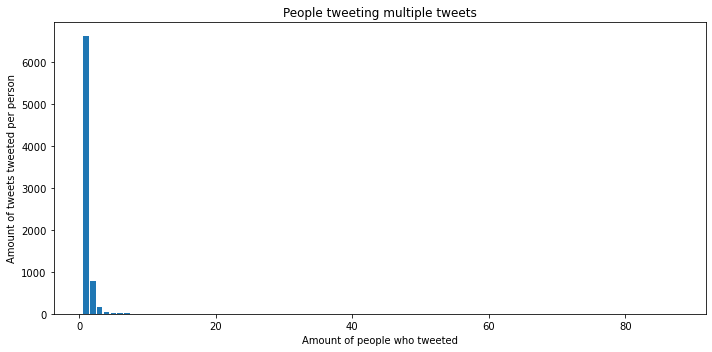

In [32]:
#x = np.arange(len(x))/
width = 0.35  # the width of the bars

fig = plt.figure(figsize = (10, 5))
plt.bar(x, y)
#plt.set_xtickslabels(x)
plt.xlabel("Amount of people who tweeted")
plt.ylabel("Amount of tweets tweeted per person")
plt.title("People tweeting multiple tweets")
plt.tight_layout()
#plt.set_xticks(x)
plt.show();

In [33]:
df.head()

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
0,3/14/2020 23:55,AlbertoxVazquez,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,1.238980e+18
1,3/14/2020 23:54,TheOGKennedy,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,1.238980e+18
2,3/14/2020 23:45,megmarie5,0,0,0,@ariana2525 I myself suffered & still suffer. ...,@ariana2525,NaN,1.238970e+18
3,3/14/2020 23:43,BoozyBillsBabe,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,1.238970e+18
4,3/14/2020 23:42,megmarie5,0,0,1,I’m behind on @VanderpumpRules and binge watch...,@VanderpumpRules @ariana2525,NaN,1.238970e+18


In [34]:
top_retweets = df.sort_values(by = ['retweets'],ascending= False, axis = 0)
#df of retweets with index with most retweets first
top_retweets.head(10).index.tolist()
#index of top retweeted tweets
top_retweets.head(50)

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
98,3/15/2020 17:44,PamKeithFL,39,447,1990,"Never, not one time, during Obama’s presidency...",NaN,NaN,1.239250e+18
443,2020-03-17 04:26:42,disruptionary,38,421,1537,#COVID19 could be the moment that #MedicareFor...,@berniesanders,#COVID19 #MedicareForAll,1.239770e+18
604,2020-03-18 00:38:37,atrupar,41,360,724,The last time the unemployment rate was 20% wa...,NaN,NaN,1.240075e+18
93,2020-03-17 21:25:41,ngyntlinh,9,234,1584,"My dad suffers from depression, & I think abou...",NaN,NaN,1.240027e+18
93,2020-03-17 19:03:23,_chismosa_,2,178,729,Reminder that you absolutely don’t have to apo...,NaN,NaN,1.239991e+18
190,2020-07-28 20:47:23,GamesRedDeer,27,172,427,PLAY & Let The Fun Begin Like + RT + Click htt...,NaN,NaN,1.288214e+18
211,2020-07-28 20:47:23,GamesRedDeer,27,172,427,PLAY & Let The Fun Begin Like + RT + Click htt...,NaN,NaN,1.288214e+18
1,7/28/2020 20:47,GamesRedDeer,27,172,426,PLAY & Let The Fun Begin Like + RT + Click htt...,NaN,NaN,1.288210e+18
127,2020-07-28 20:47:23,GamesRedDeer,27,172,427,PLAY & Let The Fun Begin Like + RT + Click htt...,NaN,NaN,1.288214e+18
190,2020-07-28 20:47:23,GamesRedDeer,27,172,427,PLAY & Let The Fun Begin Like + RT + Click htt...,NaN,NaN,1.288214e+18


In [35]:
top_retweets.iloc[1]
#has 33 posts, all spam, maybe get rid of?

date                                       2020-03-17 04:26:42
username                                         disruptionary
replies                                                     38
retweets                                                   421
favorites                                                 1537
text         #COVID19 could be the moment that #MedicareFor...
mentions                                        @berniesanders
hashtags                              #COVID19 #MedicareForAll
id                                                 1.23977e+18
Name: 443, dtype: object

In [36]:
tag_list= set(list(df.hashtags.tolist()))

In [37]:
len(tag_list)

1033

Below does not work, get rid

In [38]:
tag_list_dupes =(df.hashtags.tolist())
nan = float('nan')
type(nan), type(tag_list_dupes[0]),tag_list_dupes[0] == nan, tag_list_dupes[0], nan
print( np.isnan(int(6)))
#nans are dumb

False


In [39]:
tag_list_nonan = [tag for tag in tag_list_dupes if type(tag) == str]
#all nans are floats, filtering out all the floats instead of all nans

In [40]:
len(tag_list_nonan)

1341

In [41]:
df_nonan = df.hashtags.dropna()
#df[df['hashtags'].str.contains('covid')]

In [42]:
df_nonan.columns

AttributeError: 'Series' object has no attribute 'columns'

End of delete block

In [43]:
covid = (df_nonan[df_nonan.str.contains('covid')])
Covid = (df_nonan[df_nonan.str.contains('Covid')])
COVID = (df_nonan[df_nonan.str.contains('COVID')])
rona = (df_nonan[df_nonan.str.contains('rona')])
depression = (df_nonan[df_nonan.str.contains('depression')])
anxiety = (df_nonan[df_nonan.str.contains('anxiety')])
#RONA = (df_nonan[df_nonan.str.contains('RONA')])
mental = (df_nonan[df_nonan.str.contains('mental')])
mix=(df_nonan[df_nonan.str.contains('COVID', 'rona')])

#dataframes keeping track of string matches

In [44]:
len(covid), len(Covid), len(COVID), len(rona), len(RONA), len(depression), len(anxiety), len(mental), len(mix)

NameError: name 'RONA' is not defined

In [235]:
COVID

36     #depression #blacktwitterlive #COVID19 #Scopat...
43                                             #COVIDー19
149    #sayitsatursay #mentalhealth #mentalillness #C...
151                     #coronanxiety #COVID #depression
163                        #MentalHealthMatters #COVID19
                             ...                        
945       #Caturday #COVID19 #StayHome #CatsOfTwitterpic
44                                       #COVID19toronto
179                                  #COVIDー19 #stayhome
183                          #SocialDistancing #COVIDー19
257                                             #COVID19
Name: hashtags, Length: 103, dtype: object

In [249]:
unsplit = df_nonan.tolist()
#list where all hashtags per tweet are one string

In [266]:
unsplit

['#iamsoblessed #tpforsale #yoga #meditation #ithinkstupidthingsrfunny',
 '#iamsoblessed #tpforsale #yoga #meditation #ithinkstupidthingsrfunny',
 '#BITCHCRAFT',
 '#depression #blacktwitterlive #COVID19 #Scopatumanaa',
 '#KeepAStrongMind',
 '#COVIDー19',
 '#toiletpapercrisis #coronapocalypsepic',
 '#Depression',
 '#MentalHealthMatters #MentalHealthAwareness #depression #bipolar',
 '#VISION',
 '#PTSD #ANXIETY #DEPRESSION #OCD #EATINGDISORDER',
 '#bellasantecbd #buylocal #depressionhelp #depression #anxietyrelief #cbdheals #allnatural #cbddrops #watersoluablecbdpic',
 '#faithinAmerica',
 '#CoronavirusPandemic',
 '#sayitsatursay #mentalhealth #mentalillness #COVIDー19pic',
 '#chronicillnesses #LoverFest',
 '#coronanxiety #COVID #depression',
 '#Anxiety #depression #OCD',
 '#MentalHealthMatters #COVID19',
 '#OneStepCloserToWonho #WonhoIsAlmostHome',
 '#rvgiveaway #campingworld #getusouttahere #holymosquitos',
 '#coronapocalypse #CoronaOutbreak #coronavirus',
 '#coronavirus #QuarantineAndChil

In [253]:
split = [ob.split(' ') for ob in unsplit ]
#list of lists of all hashtags per tweet

In [254]:
split

[['#iamsoblessed',
  '#tpforsale',
  '#yoga',
  '#meditation',
  '#ithinkstupidthingsrfunny'],
 ['#iamsoblessed',
  '#tpforsale',
  '#yoga',
  '#meditation',
  '#ithinkstupidthingsrfunny'],
 ['#BITCHCRAFT'],
 ['#depression', '#blacktwitterlive', '#COVID19', '#Scopatumanaa'],
 ['#KeepAStrongMind'],
 ['#COVIDー19'],
 ['#toiletpapercrisis', '#coronapocalypsepic'],
 ['#Depression'],
 ['#MentalHealthMatters', '#MentalHealthAwareness', '#depression', '#bipolar'],
 ['#VISION'],
 ['#PTSD', '#ANXIETY', '#DEPRESSION', '#OCD', '#EATINGDISORDER'],
 ['#bellasantecbd',
  '#buylocal',
  '#depressionhelp',
  '#depression',
  '#anxietyrelief',
  '#cbdheals',
  '#allnatural',
  '#cbddrops',
  '#watersoluablecbdpic'],
 ['#faithinAmerica'],
 ['#CoronavirusPandemic'],
 ['#sayitsatursay', '#mentalhealth', '#mentalillness', '#COVIDー19pic'],
 ['#chronicillnesses', '#LoverFest'],
 ['#coronanxiety', '#COVID', '#depression'],
 ['#Anxiety', '#depression', '#OCD'],
 ['#MentalHealthMatters', '#COVID19'],
 ['#OneStep

In [258]:
flat_combo = [word for word_list in split for word in word_list]
#flat list of all hashtags

In [259]:
flat_combo

['#iamsoblessed',
 '#tpforsale',
 '#yoga',
 '#meditation',
 '#ithinkstupidthingsrfunny',
 '#iamsoblessed',
 '#tpforsale',
 '#yoga',
 '#meditation',
 '#ithinkstupidthingsrfunny',
 '#BITCHCRAFT',
 '#depression',
 '#blacktwitterlive',
 '#COVID19',
 '#Scopatumanaa',
 '#KeepAStrongMind',
 '#COVIDー19',
 '#toiletpapercrisis',
 '#coronapocalypsepic',
 '#Depression',
 '#MentalHealthMatters',
 '#MentalHealthAwareness',
 '#depression',
 '#bipolar',
 '#VISION',
 '#PTSD',
 '#ANXIETY',
 '#DEPRESSION',
 '#OCD',
 '#EATINGDISORDER',
 '#bellasantecbd',
 '#buylocal',
 '#depressionhelp',
 '#depression',
 '#anxietyrelief',
 '#cbdheals',
 '#allnatural',
 '#cbddrops',
 '#watersoluablecbdpic',
 '#faithinAmerica',
 '#CoronavirusPandemic',
 '#sayitsatursay',
 '#mentalhealth',
 '#mentalillness',
 '#COVIDー19pic',
 '#chronicillnesses',
 '#LoverFest',
 '#coronanxiety',
 '#COVID',
 '#depression',
 '#Anxiety',
 '#depression',
 '#OCD',
 '#MentalHealthMatters',
 '#COVID19',
 '#OneStepCloserToWonho',
 '#WonhoIsAlmostHom

In [260]:
flat_string = " ".join(tag for tag in flat_combo)
#all hashtags to one string

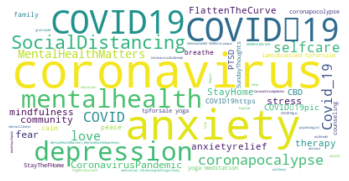

In [264]:
wordcloud = WordCloud(background_color="white").generate(flat_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [268]:
count_of_tags = Counter(flat_combo)
count_of_tags

Counter({'#iamsoblessed': 4,
         '#tpforsale': 4,
         '#yoga': 4,
         '#meditation': 5,
         '#ithinkstupidthingsrfunny': 4,
         '#BITCHCRAFT': 1,
         '#depression': 26,
         '#blacktwitterlive': 1,
         '#COVID19': 40,
         '#Scopatumanaa': 1,
         '#KeepAStrongMind': 1,
         '#COVIDー19': 43,
         '#toiletpapercrisis': 1,
         '#coronapocalypsepic': 1,
         '#Depression': 2,
         '#MentalHealthMatters': 8,
         '#MentalHealthAwareness': 3,
         '#bipolar': 2,
         '#VISION': 1,
         '#PTSD': 4,
         '#ANXIETY': 2,
         '#DEPRESSION': 2,
         '#OCD': 4,
         '#EATINGDISORDER': 2,
         '#bellasantecbd': 2,
         '#buylocal': 2,
         '#depressionhelp': 2,
         '#anxietyrelief': 4,
         '#cbdheals': 2,
         '#allnatural': 2,
         '#cbddrops': 2,
         '#watersoluablecbdpic': 2,
         '#faithinAmerica': 1,
         '#CoronavirusPandemic': 6,
         '#sayitsatu

In [269]:
count_of_tags.most_common(10)

[('#coronavirus', 90),
 ('#anxiety', 61),
 ('#COVIDー19', 43),
 ('#COVID19', 40),
 ('#depression', 26),
 ('#mentalhealth', 18),
 ('#Anxiety', 14),
 ('#SocialDistancing', 11),
 ('#coronapocalypse', 9),
 ('#MentalHealthMatters', 8)]

In [270]:
df.drop(df[df['username'] == 'GamesRedDeer'].index, inplace = True)
#dropping outlier 

In [271]:
df.head()

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
0,3/14/2020 23:55,AlbertoxVazquez,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,1.238980e+18
2,3/14/2020 23:45,megmarie5,0,0,0,@ariana2525 I myself suffered & still suffer. ...,@ariana2525,NaN,1.238970e+18
3,3/14/2020 23:43,BoozyBillsBabe,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,1.238970e+18
4,3/14/2020 23:42,megmarie5,0,0,1,I’m behind on @VanderpumpRules and binge watch...,@VanderpumpRules @ariana2525,NaN,1.238970e+18
5,3/14/2020 23:37,PostpartumW,0,1,3,Postpartum depression and anxiety can occur wi...,NaN,NaN,1.238970e+18


In [272]:
df.sort_values(by = ['retweets'],ascending= False, axis = 0)

,date,username,replies,retweets,favorites,text,mentions,hashtags,id
98,3/15/2020 17:44,PamKeithFL,39,447,1990,"Never, not one time, during Obama’s presidency...",NaN,NaN,1.239250e+18
261,3/15/2020 4:37,SpencerICE9K,16,155,1156,Post Friday The 13th depression. Ki Ki Ki Ca-R...,NaN,NaN,1.239050e+18
105,3/14/2020 17:53,Homsey_Tara,74,72,707,"Yesterday when depression kicked in, instead o...",NaN,NaN,1.238890e+18
170,3/15/2020 13:19,ScottWalker,17,54,273,"Do not be anxious about anything, but in every...",NaN,NaN,1.239180e+18
543,3/14/2020 14:13,jgpurplesbts,19,43,263,"In my 52 years, I don’t recall another event t...",@BTS_twt,#BTSARMY,1.238830e+18
...,...,...,...,...,...,...,...,...,...
898,3/14/2020 2:15,VicDFW,0,0,14,YouTube TV is not perfect but having nine SMU ...,NaN,#SocialDistancing #KnowsHowToPartypic,1.238650e+18
899,3/14/2020 2:15,drewwpg,4,0,7,If those are fireworks going off downtown they...,NaN,NaN,1.238650e+18
900,3/14/2020 2:15,teamchinksmil3y,1,0,2,Actually anxiety can cause that.,NaN,NaN,1.238650e+18
901,3/14/2020 2:13,alexameri65,0,0,2,Me: *chest gets v tight and hard to breathe* M...,NaN,NaN,1.238650e+18


In [275]:
user_count = df.username.value_counts()
counts_2 = user_count.tolist()
counts_of_tweets_2 = Counter(counts_2)
# a count of how many people have multiple tweets

w = list(counts_of_tweets_2.keys())
#amout of tweet
q = list(counts_of_tweets_2.values())
#amount of people
type(x)
w, q

([11, 7, 6, 5, 4, 3, 2, 1], [1, 1, 4, 5, 16, 32, 219, 2524])

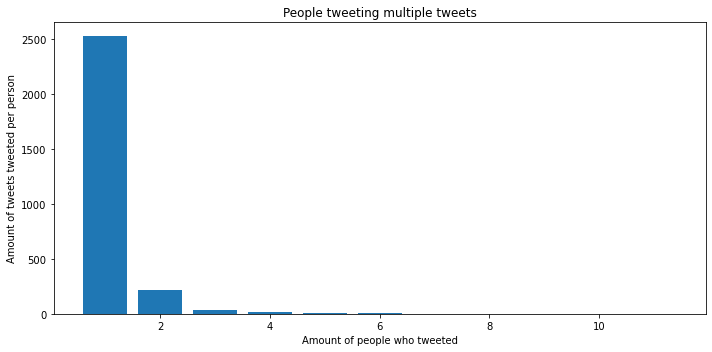

In [276]:
width_2 = 0.35  # the width of the bars

fig_2 = plt.figure(figsize = (10, 5))
plt.bar(w, q)
#plt.set_xtickslabels(x)
plt.xlabel("Amount of people who tweeted")
plt.ylabel("Amount of tweets tweeted per person")
plt.title("People tweeting multiple tweets")
plt.tight_layout()
#plt.set_xticks(x)
plt.show();

#graph with outlier removed

In [277]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def data_cleaner(doc):
    """A function to strip punctuation, strip stopwords, casefold, lemmatize,
    And part pf speech tag words for clean data for modeling"""
    
    sw = stopwords.words('english')
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    #print(doc)
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    #print(doc)
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    #print(' '.join(doc))
    return ' '.join(doc)